# Libraries 

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram


# Load Data set 

In [5]:
data = pd.read_excel('OnlineRetail.xlsx')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
data=data.head(100000)

# Box PLot 

In [9]:
def plot_box_plots(df):
    # Select numerical columns
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    
    # Plot box plots for each numerical column
    plt.figure(figsize=(12, 6))
    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(1, len(numerical_columns), i)
        sns.boxplot(y=df[column])
        plt.title('Box Plot of {}'.format(column))
        plt.ylabel(column)
    
    plt.tight_layout()
    plt.show()

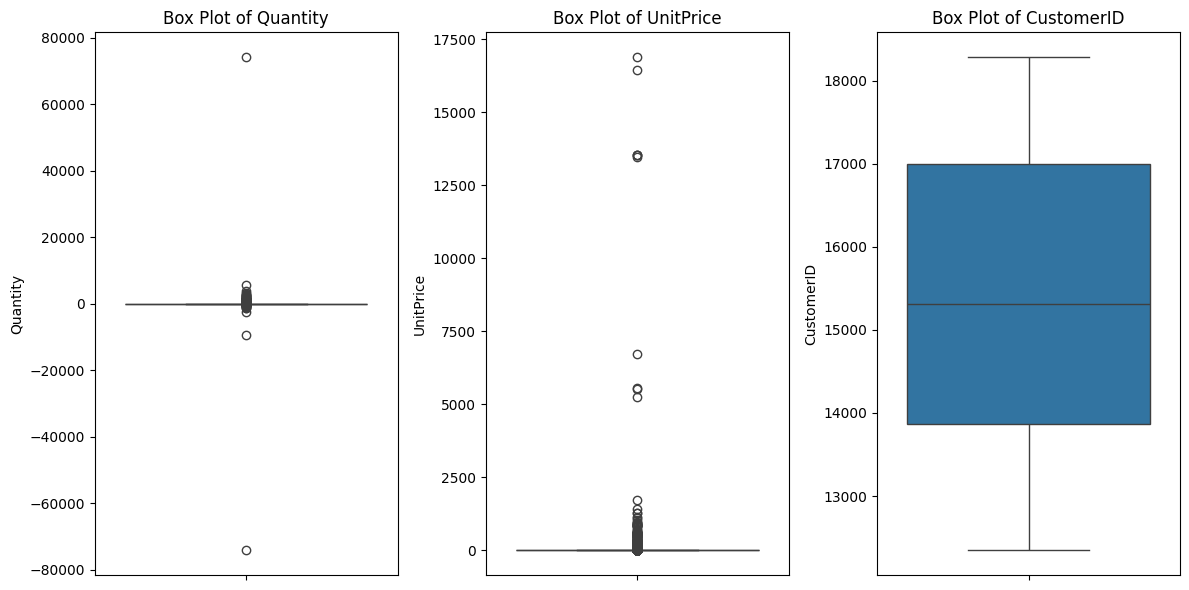

In [15]:
plot_box_plots(data)

# Remove outliers

In [14]:
def remove_outliers(df, columns):
    df_cleaned = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]
    
    return df_cleaned
columns_to_clean = ['Quantity', 'UnitPrice']
cleaned_data=data
for i in range(10):
    cleaned_data = remove_outliers(cleaned_data, columns_to_clean)
    print(f"Iteration {i+1}: Number of rows after removing outliers: {len(cleaned_data)}")

print(cleaned_data.head())


Iteration 1: Number of rows after removing outliers: 82642
Iteration 2: Number of rows after removing outliers: 79198
Iteration 3: Number of rows after removing outliers: 78462
Iteration 4: Number of rows after removing outliers: 75823
Iteration 5: Number of rows after removing outliers: 75823
Iteration 6: Number of rows after removing outliers: 75823
Iteration 7: Number of rows after removing outliers: 75823
Iteration 8: Number of rows after removing outliers: 75823
Iteration 9: Number of rows after removing outliers: 75823
Iteration 10: Number of rows after removing outliers: 75823
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHI

# Cleaned Data 

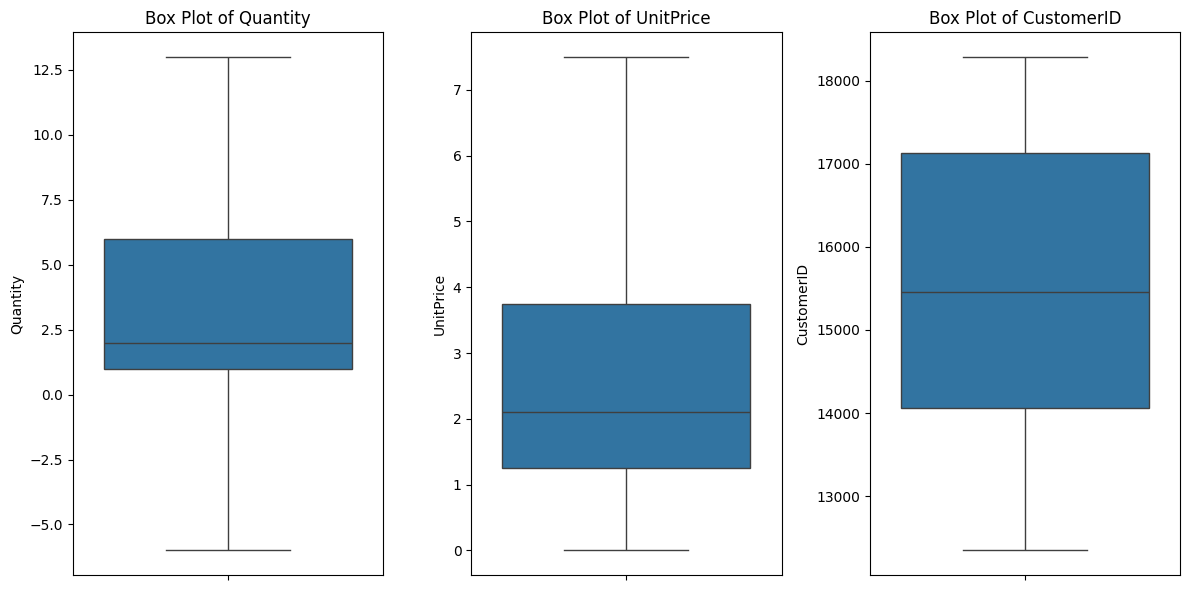

In [16]:
plot_box_plots(cleaned_data)

# Preprocess


In [19]:
def preprocess_dataframe(df):
    df.dropna(inplace=True)
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    numerical_columns = ['Quantity', 'UnitPrice', 'CustomerID']
    scaler = StandardScaler()
    df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
    
    return df

In [21]:
preprocessed_data = preprocess_dataframe(cleaned_data)
print(preprocessed_data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  0.193859   
1    536365     71053                  WHITE METAL LANTERN  0.193859   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER  0.670749   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE  0.193859   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.  0.193859   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00   0.071316     1.34932  United Kingdom  
1 2010-12-01 08:26:00   0.616982     1.34932  United Kingdom  
2 2010-12-01 08:26:00   0.201236     1.34932  United Kingdom  
3 2010-12-01 08:26:00   0.616982     1.34932  United Kingdom  
4 2010-12-01 08:26:00   0.616982     1.34932  United Kingdom  


# K Means

In [22]:
def apply_kmeans(data, num_clusters_list):
    clustering_results = []
    for num_clusters in num_clusters_list:
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        kmeans.fit(data)
        labels = kmeans.labels_
        clustering_results.append(labels)
    
    return clustering_results

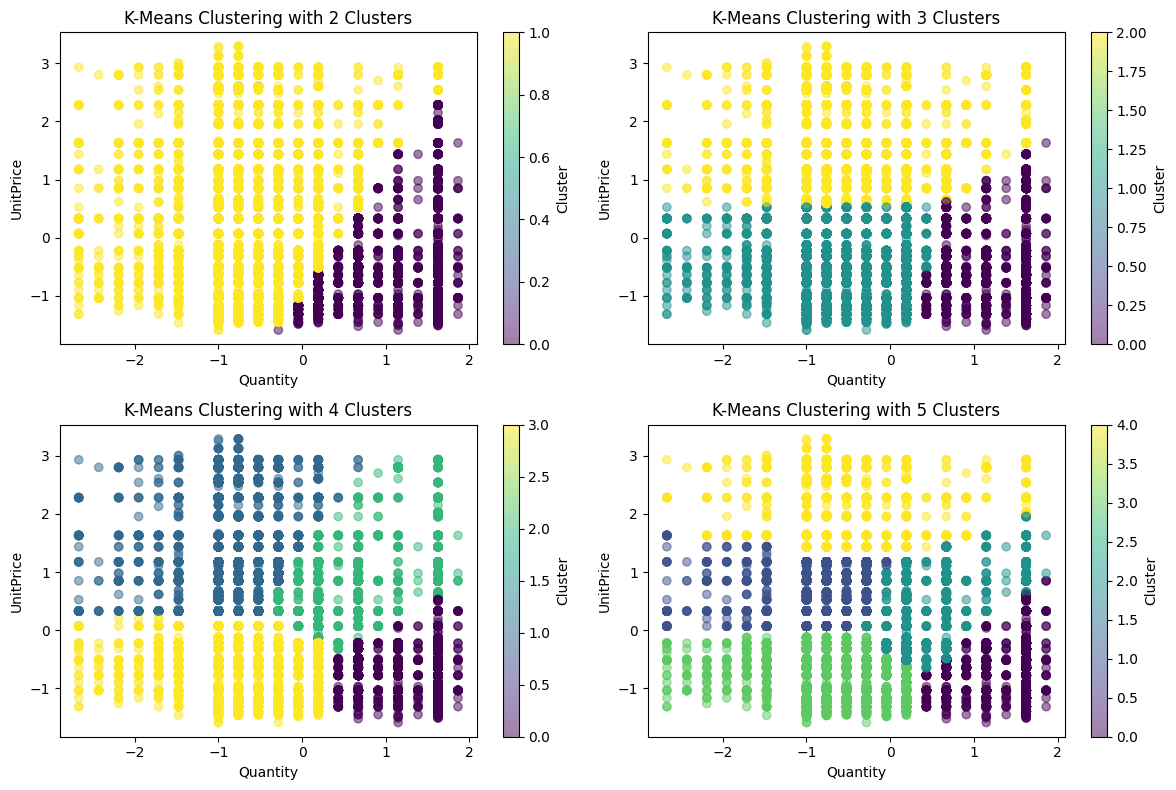

In [24]:
num_clusters_list = [2, 3, 4, 5]
clustering_results = apply_kmeans(preprocessed_data[['Quantity', 'UnitPrice']], num_clusters_list)
plt.figure(figsize=(12, 8))
for i, num_clusters in enumerate(num_clusters_list):
    plt.subplot(2, 2, i+1)
    plt.scatter(preprocessed_data['Quantity'], preprocessed_data['UnitPrice'], c=clustering_results[i], cmap='viridis', alpha=0.5)
    plt.title('K-Means Clustering with {} Clusters'.format(num_clusters))
    plt.xlabel('Quantity')
    plt.ylabel('UnitPrice')
    plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

# hierarchical using complete linkage    on complete data et 

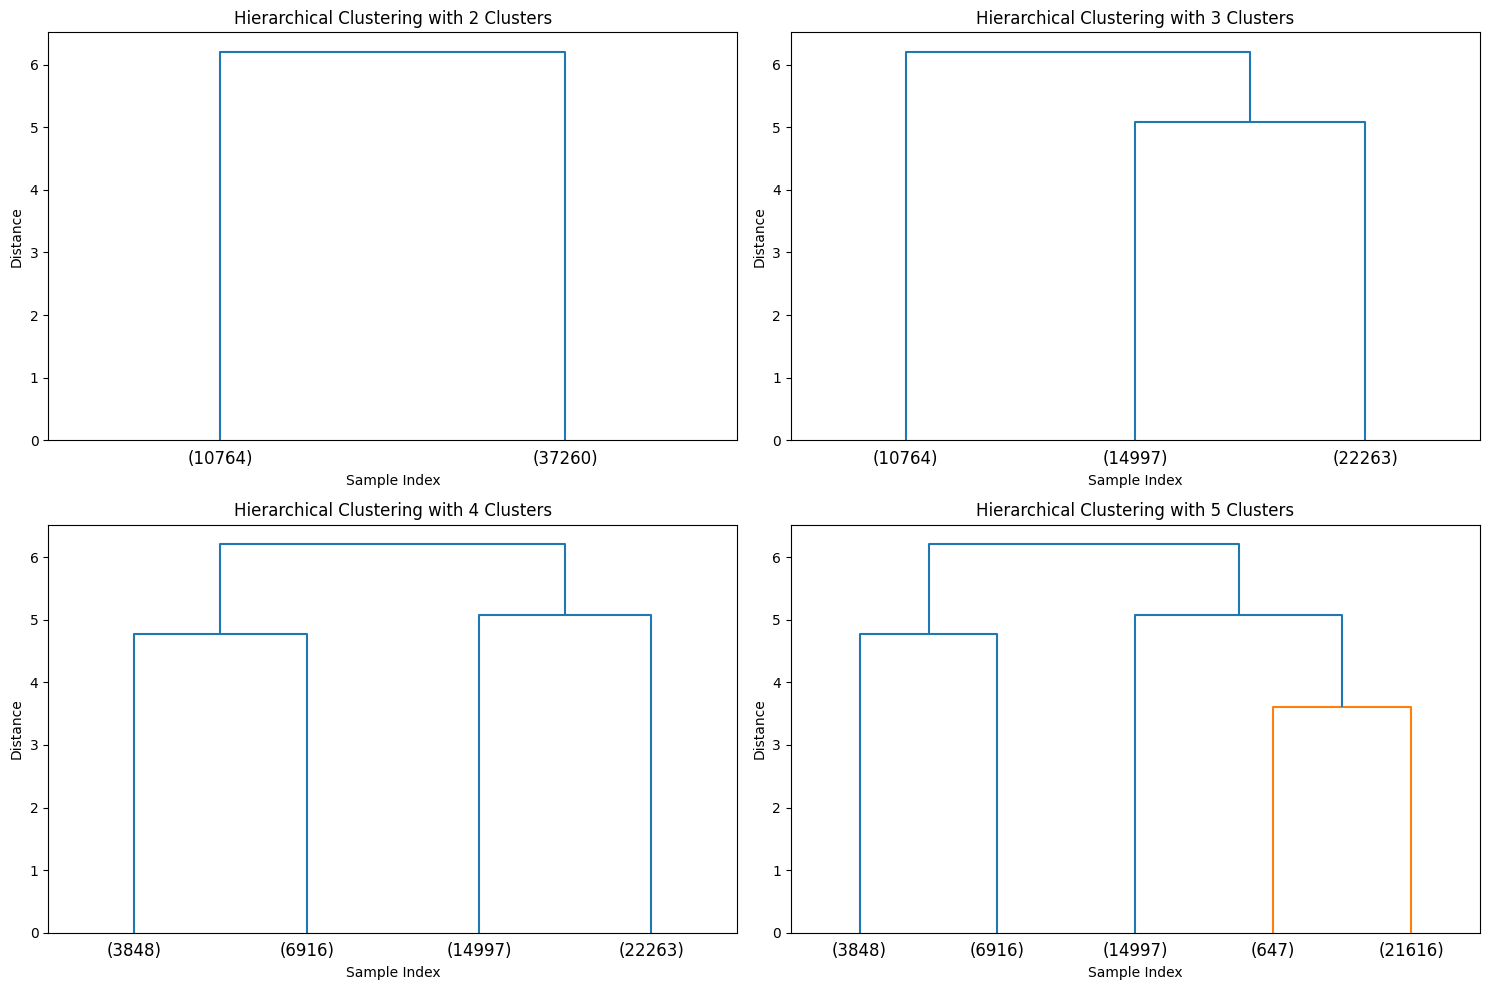

In [27]:
def hierarchical_clustering(data, num_clusters_list):
    plt.figure(figsize=(15, 10))
    for i, num_clusters in enumerate(num_clusters_list, 1):
        plt.subplot(2, 2, i)
        Z = linkage(data, method='complete')
        dendrogram(Z, truncate_mode='lastp', p=num_clusters, show_leaf_counts=True)
        plt.title(f'Hierarchical Clustering with {num_clusters} Clusters')
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()
num_clusters_list = [2, 3, 4, 5]
hierarchical_clustering(preprocessed_data[['Quantity', 'UnitPrice']], num_clusters_list)


# hierarchical Aglomeritive using ward linkage   on sample data set 

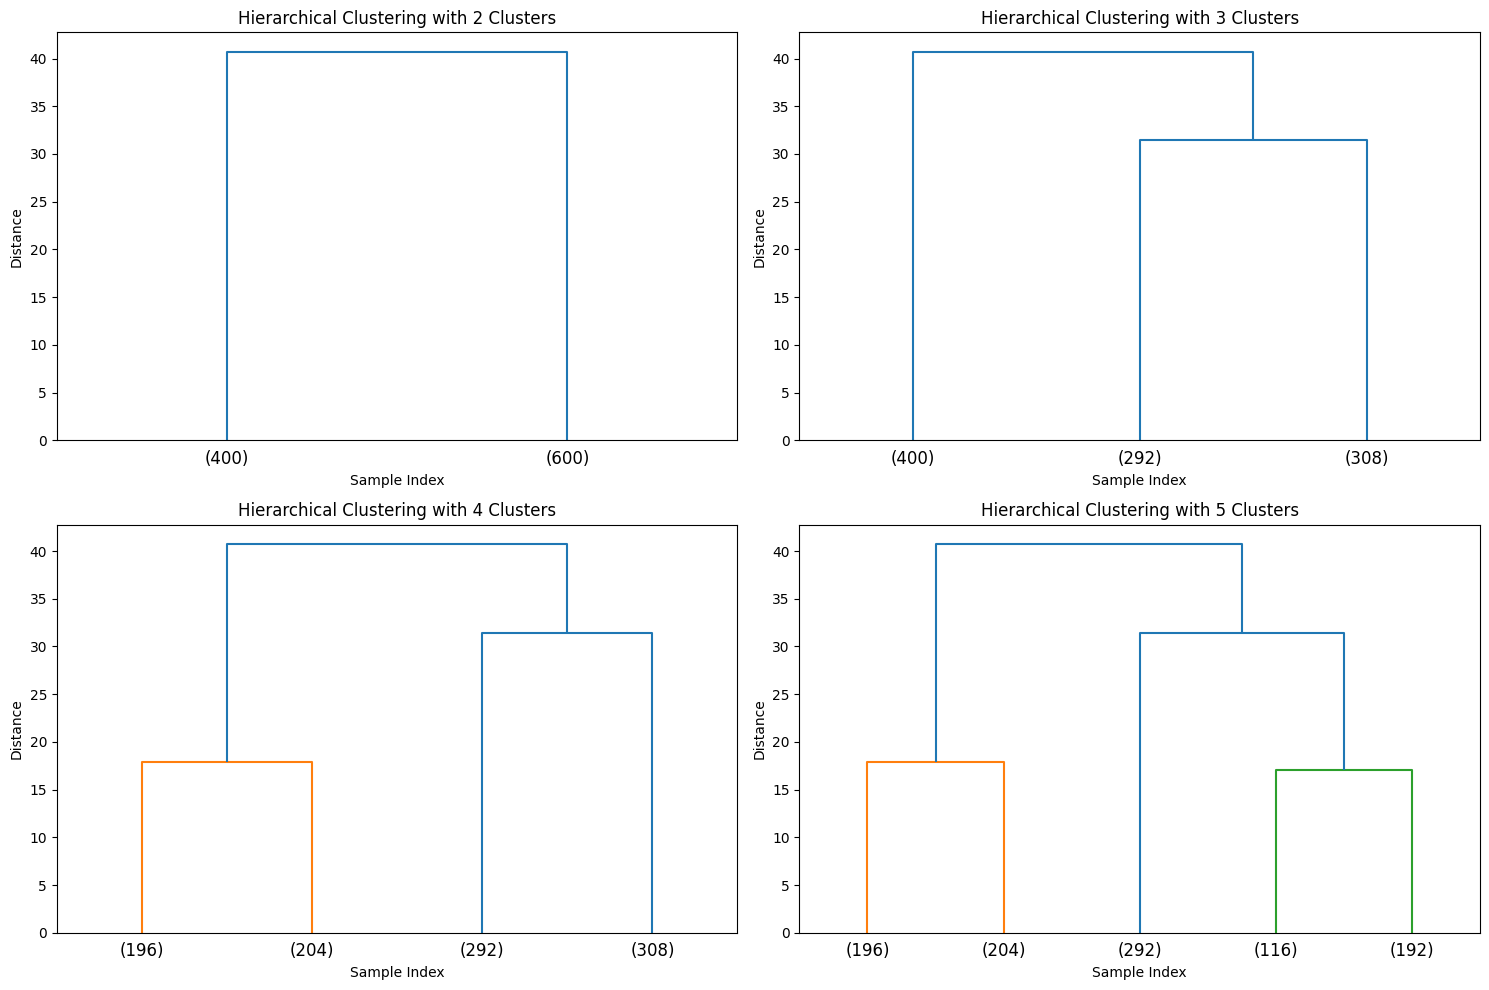

In [29]:
from scipy.cluster.hierarchy import dendrogram, ward

def hierarchical_clustering(data, num_clusters_list):
    plt.figure(figsize=(15, 10))
    for i, num_clusters in enumerate(num_clusters_list, 1):
        plt.subplot(2, 2, i)
        Z = ward(data)
        dendrogram(Z, truncate_mode='lastp', p=num_clusters, show_leaf_counts=True)
        plt.title(f'Hierarchical Clustering with {num_clusters} Clusters')
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()
sample_data = preprocessed_data.sample(n=1000, random_state=42)
num_clusters_list = [2, 3, 4, 5]
hierarchical_clustering(sample_data[['Quantity', 'UnitPrice']], num_clusters_list)
